# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; Aaron Nguyen.</p>
# <p style="text-align: right;"> &#9989; aaronng03.</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, March 29th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will also be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font>
```bash
git clone -b hw03_branch https://github.com/aaronng03/CMSE202-s24-turnin.git

or

git clone -b hw03_branch --single-branch https://github.com/aaronng03/CMSE202-s24-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---
# Part 2: Loading the datasets (11 points)

In Parts 2-4, you will be working with the world happiness report datasets that are available at https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

Note that while Parts 3 and 4 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3 or 4. To get started on Part 2, **you'll need to download the following files**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv`

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above two CSV files in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv

and

curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv
```

&#9989;  **Question 2.2 (4 points)**: Next, load the data in both files into different Pandas DataFrames and display the first and last 5 rows for each frame. 

In [2]:
# Load data into a DataFrame
df_22 = pd.read_csv('WHR_2022.csv')
df_23 = pd.read_csv('WHR_2023.csv')

print('First 5 rows for 2022:')
print(df_22.head())
print('Last 5 rows for 2022:')
print(df_22.tail())
print()
print('First 5 rows for 2023:')
print(df_23.head())
print('Last 5 rows for 2023:')
print(df_23.tail())

First 5 rows for 2022:
       country          region  happiness_score  gdp_per_capita  \
0      Finland  Western Europe            7.821           1.892   
1      Denmark  Western Europe            7.636           1.953   
2      Iceland  Western Europe            7.557           1.936   
3  Switzerland  Western Europe            7.512           2.026   
4  Netherlands  Western Europe            7.415           1.945   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           1.258                    0.775                         0.736   
1           1.243                    0.777                         0.719   
2           1.320                    0.803                         0.718   
3           1.226                    0.822                         0.677   
4           1.206                    0.787                         0.651   

   generosity  perceptions_of_corruption  
0       0.109                      0.534  
1       0.188                  

&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [3]:
# Removes anything with NaN
new_22 = df_22.dropna()
new_23 = df_23.dropna()

&#9989;  **Question 2.4 (3 points)**: Lets do a bit of data analysis with the pandas frames. Display the countries with the top 3% scores (round the number of countries above to an integer) in the `happiness_score` column for 2022 and 2023. Are the countries different between the years?

In [4]:
# SaturnCloud.io. Accessed on March 23, 2024 from https://saturncloud.io/blog/how-to-find-percentile-stats-of-a-given-column-using-pandas
# /#:~:text=the%20Percentile%20Statistics-,Use%20the%20quantile()%20Function,(75th%20percentile)%2C%20etc.
top_3_percent_2022 = int(new_22['happiness_score'].quantile(0.03))
top_3_percent_2023 = int(new_23['happiness_score'].quantile(0.03))

# Display the highest scored countries for 2022 and 2023
print('The countries with the top 3% scores for 2022')
print(new_22.iloc[: top_3_percent_2022, [0, 2]])
print()
print('The countries with the top 3% scores for 2023')
print(new_23.iloc[: top_3_percent_2023, [0, 2]])

The countries with the top 3% scores for 2022
   country  happiness_score
0  Finland            7.821
1  Denmark            7.636
2  Iceland            7.557

The countries with the top 3% scores for 2023
   country  happiness_score
0  Finland            7.804
1  Denmark            7.586
2  Iceland            7.530


<font size=6 color="#009600">&#9998;</font> The same countries had the highest happiness scores for both years.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear Regression (30 points)

In this part, we'll perform some one-variable linear regression analysis on the world happiness data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `happiness_score` using the `healthy_life_expectancy` column separately for 2022 and 2023 and **display the results summaries** for both years. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

### Linear Regression for 2022

In [5]:
# Define the X and Y variables for the model
X_22 = new_22['happiness_score']
Y_22 = new_22['healthy_life_expectancy']

# Add a constant for the independent variable
X_const = sm.add_constant(X_22)

# Fit and summarize OLS model
model_22 = sm.OLS(Y_22, X_const).fit()

# Predict the happiness score for 2022

print('Prediction of happiness scores for 2022:')
print(model_22.predict())

print(model_22.summary())

Prediction of happiness scores for 2022:
[0.8584994  0.83628005 0.82679178 0.82138707 0.80973693 0.80841578
 0.80601368 0.8037317  0.80361159 0.78391443 0.77947056 0.77935046
 0.7648178  0.76397707 0.76289613 0.7571311  0.75304755 0.75028514
 0.73647311 0.72230077 0.71749658 0.7154548  0.70968978 0.70896915
 0.70260361 0.70128246 0.69743911 0.6970788  0.69695869 0.69671848
 0.69587775 0.6944365  0.69347566 0.69335555 0.6867498  0.68074457
 0.67690122 0.67497955 0.6712563  0.66789337 0.66633201 0.66140773
 0.66116752 0.66044689 0.65960616 0.65516229 0.65480197 0.65456176
 0.65420145 0.65251998 0.65011789 0.64831632 0.64735549 0.64447297
 0.6424312  0.64171057 0.63582544 0.63354345 0.63198209 0.62825885
 0.62669749 0.62261393 0.6217732  0.6191309  0.61829017 0.61348598
 0.61192462 0.61108389 0.60820138 0.60507866 0.59174705 0.58994548
 0.58910475 0.58682276 0.5853815  0.58370004 0.57793502 0.57661387
 0.57577313 0.5748123  0.57072874 0.56760602 0.56496372 0.56496372
 0.56424309 0.5593188

### Linear Regression for 2023

In [6]:
# Define the X and Y variables for the model
X_23 = new_23['happiness_score']
Y_23 = new_23['healthy_life_expectancy']

# Add a constant for the independent variable
X_const = sm.add_constant(X_23)

# Fit and summarize OLS model
model_23 = sm.OLS(Y_23, X_const).fit()

# Predict the happiness score for 2023

print('Prediction of happiness scores for 2022:')
print(model_23.predict())

print(model_23.summary())

Prediction of happiness scores for 2022:
[ 0.59750441  0.57518612  0.56945298  0.56361747  0.55645104  0.55563202
  0.54744182  0.53976351  0.53853498  0.52778535  0.52512353  0.52491878
  0.5112002   0.50608132  0.5043409   0.50413615  0.50075769  0.49932441
  0.49430791  0.49092945  0.48048695  0.4793608   0.47516332  0.47311577
  0.47291102  0.47127298  0.46758739  0.46338991  0.46083047  0.46021621
  0.45939719  0.45745202  0.45427832  0.45049035  0.44700951  0.4466
  0.44352868  0.43994547  0.43943358  0.4393312   0.43462184  0.43052674
  0.42817206  0.42755779  0.42755779  0.42612451  0.42602213  0.42561262
  0.42561262  0.42530549  0.41701291  0.4152725   0.41517012  0.41424872
  0.41404397  0.40953936  0.40779894  0.40575139  0.40278244  0.39674217
  0.39643504  0.39489938  0.39428511  0.39418273  0.38855197  0.38599254
  0.3843545   0.38240932  0.38046415  0.37810947  0.3752429   0.37493577
  0.36869074  0.36766697  0.36428851  0.36398138  0.35814586  0.34729385
  0.34545105  

In [7]:
print('Intercept and slope of 2022')
print(model_22.params)
print()
print('Intercept and slope of 2023')
print(model_23.params)

Intercept and slope of 2022
const             -0.080839
happiness_score    0.120105
dtype: float64

Intercept and slope of 2023
const             -0.201449
happiness_score    0.102377
dtype: float64


&#9989;  **Question 3.2 (6 points)**: Answer the following questions: 

1. What were the equations of the best fit lines for 2022 and 2023? 

2. Are the slopes and intercepts of the two fitted lines identical (between the 2 years)? Would you use the 2022 model to predict for 2023?

3. Based on the R-squared values for the two cases, how do you think the models fit the data?

<font size=+3>&#9998;</font> Put your answers here:

1. 2022: y = 0.120x - 0.081
   2023: y = 0.102x - 0.201

2. They are not identical, but there is not a drastic difference between them.

3. The R-squared values for the two cases suggest that the model fits the fata by around 50 %

&#9989;  **Question 3.3 (6 points)**: Now make scatter plots of `happiness_score` (x-axis) vs. `healthy_life_expectancy` (on y-axis) for 2022 and 2023 on the same plot. Use different colors for the different years. Also plot the best fit lines on the same plot with same colors as the corresponding scatter plots. Label the axes, and add a legend, and give the plot a title.

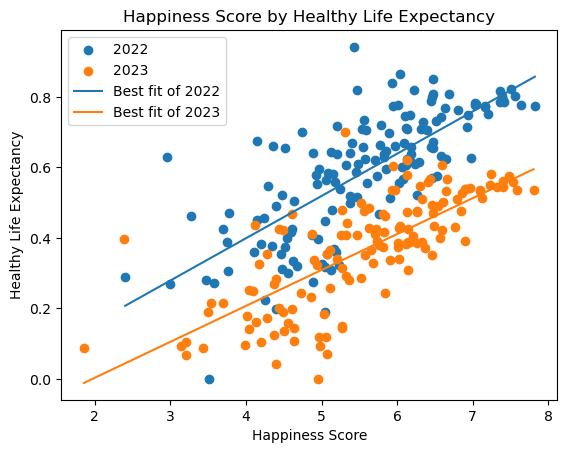

In [8]:
# Scatter plot of 2022 and 2023

plt.scatter(X_22, Y_22, label='2022')
plt.scatter(X_23, Y_23, label='2023')
plt.plot(X_22, 0.120*X_22 - 0.081, label='Best fit of 2022')
plt.plot(X_23, 0.102*X_23 - 0.201, label='Best fit of 2023')
plt.xlabel('Happiness Score')
plt.ylabel('Healthy Life Expectancy')
plt.legend()
plt.title('Happiness Score by Healthy Life Expectancy')
plt.show()

&#9989;  **Question 3.4 (2 points)**: In which year are the happiness score predictions generally better?

<font size=+3>&#9998;</font> The predictions for 2023 are better.

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fits. Make sure to create a large enough figure so that everything is easily visible. Make separate plots for 2022 and 2023.

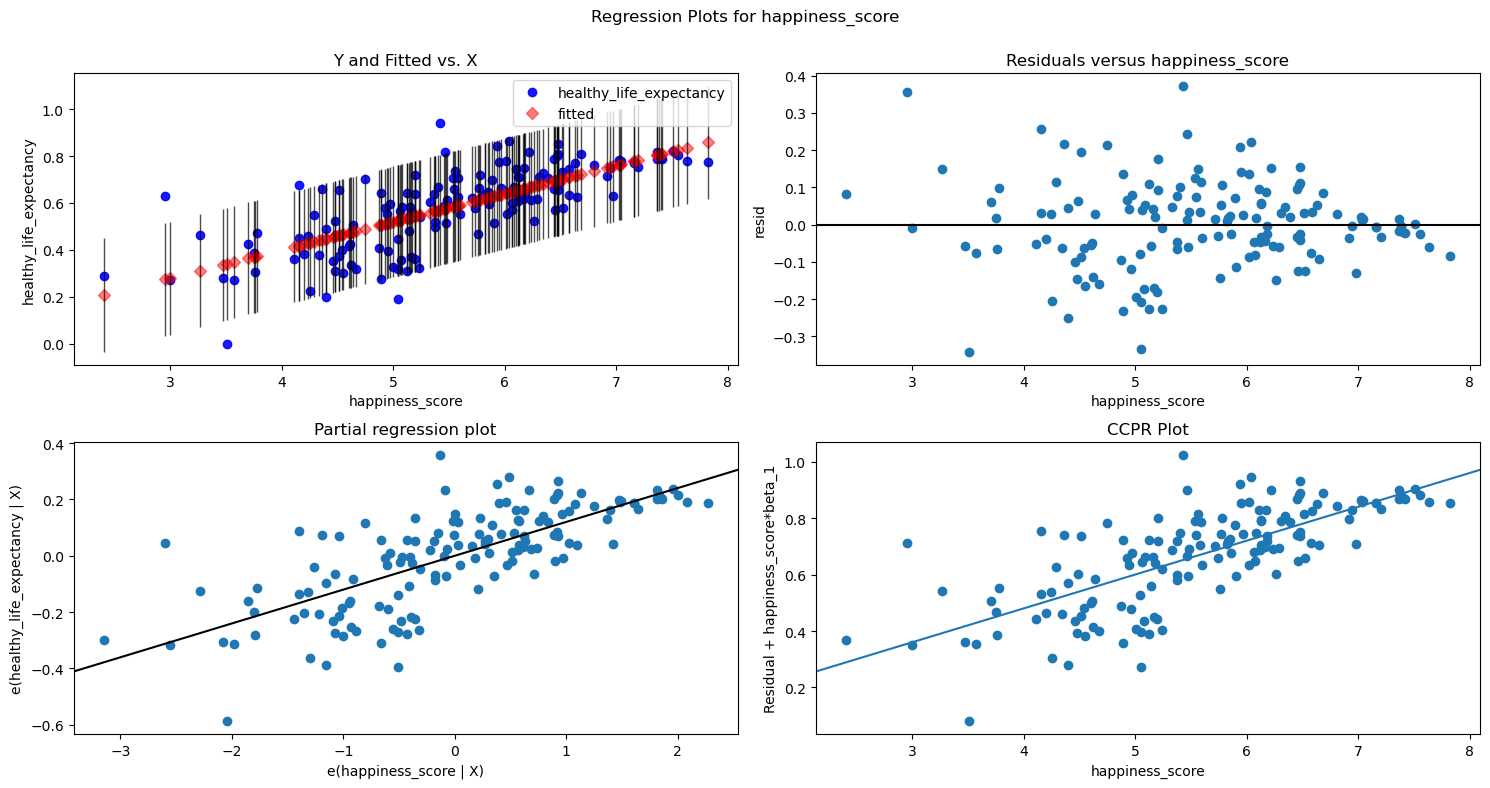

In [9]:
# Scatter plot of the 2022
fig = plt.figure(figsize=[15,8])
fig = sm.graphics.plot_regress_exog(model_22, 'happiness_score', fig=fig)

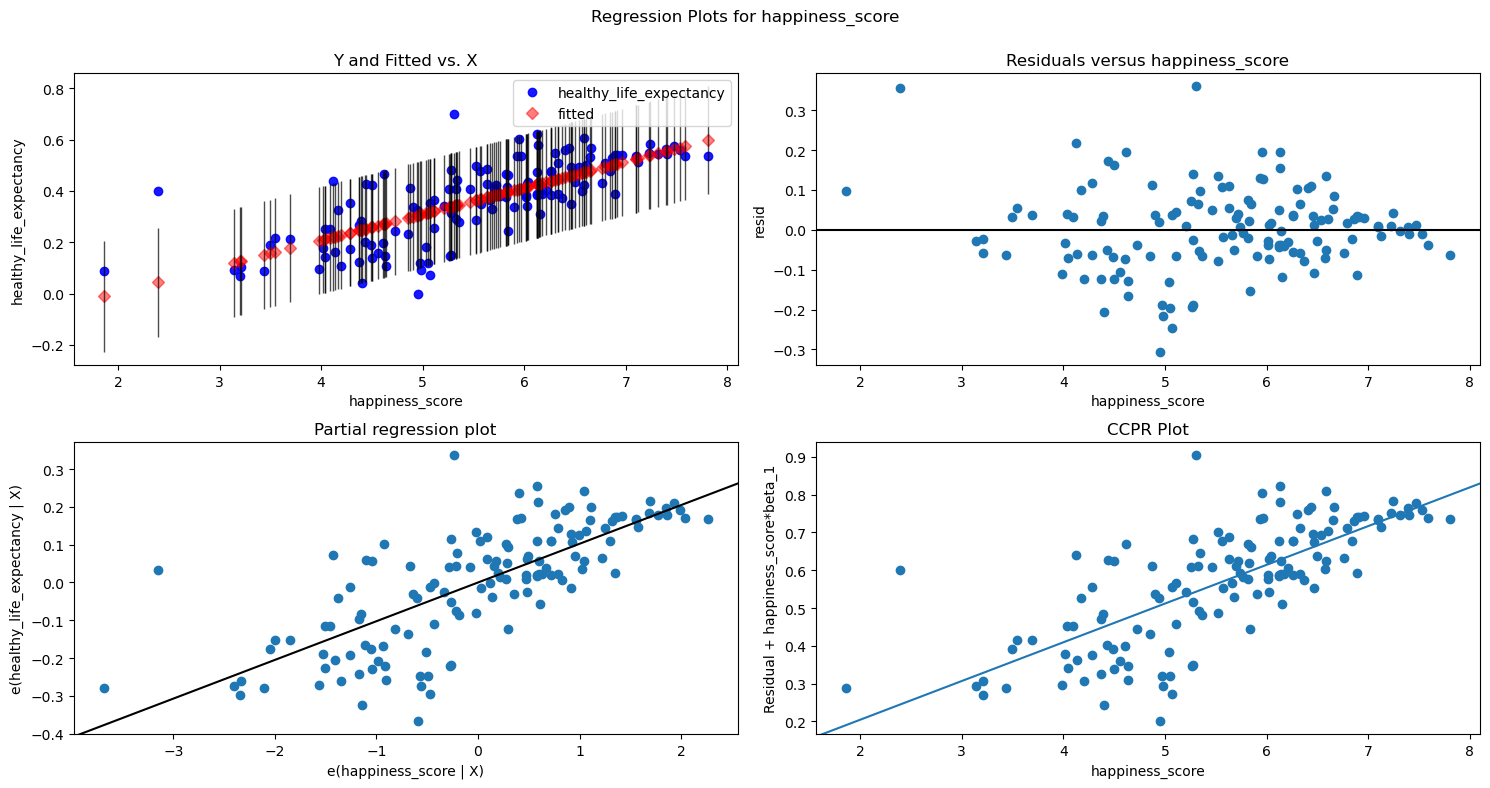

In [10]:
# Scatter plot of the 2023
fig = plt.figure(figsize=[15,8])
fig = sm.graphics.plot_regress_exog(model_23, 'happiness_score', fig=fig)

&#9989;  **Question 3.6 (6 points)**: Lets try doing the model fitting again for 2022 and 2023 but only using countries in the `region` column labeled `Western Europe`. Using the `OLS` method in `statsmodels`, perform linear regression to predict `happiness score` based on `healthy_life_expectancy` using only countries in `Western Europe` `region`. Make sure to give the objects and variables different names for this part than the previous part. How do the results compare to Question 3.1? Discuss or compare briefly the observations. You may look at the R-squared values, etc.

In [11]:
Eu_df22 = new_22[new_22['region']=='Western Europe']

# Define the X and Y variables for the model
X_22 = Eu_df22['happiness_score']
Y_22 = Eu_df22['healthy_life_expectancy']

# Add a constant for the independent variable
X_const = sm.add_constant(X_22)

# Fit and summarize OLS model
model_22 = sm.OLS(Y_22, X_const).fit()

# Predict the happiness score for 2022

print('Prediction of happiness scores for 2022:')
print(model_22.predict())

print(model_22.summary())


Prediction of happiness scores for 2022:
[0.78390819 0.78504043 0.78552392 0.78579933 0.786393   0.78646032
 0.78658272 0.78669901 0.78793529 0.78868196 0.7887248  0.78928174
 0.79012633 0.79084851 0.79213988 0.79219496 0.79231737 0.79370054
 0.79495518 0.79537135 0.79831518]
                               OLS Regression Results                              
Dep. Variable:     healthy_life_expectancy   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                 -0.010
Method:                      Least Squares   F-statistic:                    0.8010
Date:                     Thu, 28 Mar 2024   Prob (F-statistic):              0.382
Time:                             22:47:52   Log-Likelihood:                 53.974
No. Observations:                       21   AIC:                            -103.9
Df Residuals:                           19   BIC:                            -101.9
Df Model:                                1         

In [12]:
Eu_df23 = new_23[new_23['region']=='Western Europe']

# Define the X and Y variables for the model
X_22 = Eu_df23['happiness_score']
Y_22 = Eu_df23['healthy_life_expectancy']

# Add a constant for the independent variable
X_const = sm.add_constant(X_22)

# Fit and summarize OLS model
model_23 = sm.OLS(Y_22, X_const).fit()

# Predict the happiness score for 2022

print('Prediction of happiness scores for 2023:')
print(model_23.predict())

model_23.summary()

Prediction of happiness scores for 2023:
[0.54558004 0.54611206 0.54624873 0.54655866 0.54657819 0.54677342
 0.54695646 0.54698574 0.54730544 0.54775937 0.54780574 0.54788627
 0.54804002 0.54836948 0.54891858 0.54899424 0.54925048 0.54966536
 0.55006071 0.55015101]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     healthy_life_expectancy   R-squared:                       0.006
Model:                                 OLS   Adj. R-squared:                 -0.049
Method:                      Least Squares   F-statistic:                    0.1060
Date:                     Thu, 28 Mar 2024   Prob (F-statistic):              0.748
Time:                             22:47:52   Log-Likelihood:                 52.782
No. Observations:                       20   AIC:                            -101.6
Df Residuals:                           18   BIC:                            -99.57
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5646      0.052     10.892      0.000       0.456       0.674
happiness_score    -0.0024      0.007     -0.326      0.748      -0.018       0.013
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.192
Skew:                           0.189   Prob(JB):                        0.909
Kurtosis:                       2.705   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size=+3>&#9998;</font> The constants for Western Europe are positive, while the whole data's constant is negative. The whole world data is reversed, having a negative constant and positive slope.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to do predictions.

&#9989;  **Question 4.1 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `happiness_score` based on `gdp_per_capita`, `healthy_life_expectancy`, `freedom_to_make_life_choices`, and `generosity`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit models to both the 2022 and 2023 data and display summaries of both results.

In [13]:
# Define the X and Y variables for the model
import statsmodels.api as sm

X_22 = new_22[['gdp_per_capita', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity']]
Y_22 = new_22['happiness_score']

# Add a constant for the independent variable
X_const = sm.add_constant(X_22)

# Fit and summarize OLS model
model_22 = sm.OLS(Y_22, X_const)
results22 = model_22.fit()


# Predict the happiness score for 2023
print('Prediction of happiness scores for 2022:')
print(results22.predict())



print(results22.params)
results22.summary()


Prediction of happiness scores for 2022:
[6.821919   6.96597196 7.10850807 6.97391586 6.94561338 7.12365732
 7.0304767  7.08962984 6.52838448 6.81048033 6.73579929 6.90688538
 6.96000431 6.60663844 6.81618195 6.46329132 6.70524995 6.53818446
 6.20296022 6.42690369 6.55022356 6.62595708 6.24747237 6.74447174
 6.21869827 6.28297319 7.16826921 6.04068355 6.27776245 6.18147095
 6.06825506 5.87922685 6.75792169 5.9214759  5.9897303  6.55096877
 6.11814969 5.69879512 5.55858888 5.99796424 6.2122185  5.85012495
 5.99403486 5.93913611 5.52893937 5.91625453 6.06908733 6.12614991
 5.67563936 6.49524963 5.88946848 5.84629889 5.99899376 6.34505294
 5.39778623 6.37651459 5.8689781  5.42712002 6.19863172 5.56565341
 6.34661932 5.61025064 5.54993832 5.7498486  5.25746628 5.80948233
 5.74179938 5.20654639 5.7758201  6.30080182 5.52188814 6.1007462
 5.89552688 5.78175533 5.71392368 5.7151628  5.83481188 6.03096002
 6.38510139 5.55003312 6.51143705 5.6793861  5.03643468 5.07619028
 5.9422939  5.51228161

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        22:47:52   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6786      0.223      7.528      0.000       1.238       2.119
gdp_per_capita                   1.0653      0.208      5.123      0.000       0.654       1.476
healthy_life_expectancy          1.7728      0.480      3.694      0.000       0.824       2.722
freedom_to_make_life_choices     2.1722      0.394      5.515      0.000       1.394       2.951
generosity                       1.4235      0.622      2.288      0.024       0.194       2.653
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.395
Skew:                          -0.776   Prob(JB):                     0.000275
Kurtosis:                       3.533   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Define the X and Y variables for the model
import statsmodels.api as sm

X_23 = new_23[['gdp_per_capita', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity']]
Y_23 = new_23['happiness_score']

# Add a constant for the independent variable
X_const = sm.add_constant(X_23)

# Fit and summarize OLS model
model_23 = sm.OLS(Y_23, X_const)
results23 = model_22.fit()


# Predict the happiness score for 2023
print('Prediction of happiness scores for 2023:')
print(results23.predict())



print(results23.params)
results23.summary()


Prediction of happiness scores for 2023:
[6.821919   6.96597196 7.10850807 6.97391586 6.94561338 7.12365732
 7.0304767  7.08962984 6.52838448 6.81048033 6.73579929 6.90688538
 6.96000431 6.60663844 6.81618195 6.46329132 6.70524995 6.53818446
 6.20296022 6.42690369 6.55022356 6.62595708 6.24747237 6.74447174
 6.21869827 6.28297319 7.16826921 6.04068355 6.27776245 6.18147095
 6.06825506 5.87922685 6.75792169 5.9214759  5.9897303  6.55096877
 6.11814969 5.69879512 5.55858888 5.99796424 6.2122185  5.85012495
 5.99403486 5.93913611 5.52893937 5.91625453 6.06908733 6.12614991
 5.67563936 6.49524963 5.88946848 5.84629889 5.99899376 6.34505294
 5.39778623 6.37651459 5.8689781  5.42712002 6.19863172 5.56565341
 6.34661932 5.61025064 5.54993832 5.7498486  5.25746628 5.80948233
 5.74179938 5.20654639 5.7758201  6.30080182 5.52188814 6.1007462
 5.89552688 5.78175533 5.71392368 5.7151628  5.83481188 6.03096002
 6.38510139 5.55003312 6.51143705 5.6793861  5.03643468 5.07619028
 5.9422939  5.51228161

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        22:47:52   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6786      0.223      7.528      0.000       1.238       2.119
gdp_per_capita                   1.0653      0.208      5.123      0.000       0.654       1.476
healthy_life_expectancy          1.7728      0.480      3.694      0.000       0.824       2.722
freedom_to_make_life_choices     2.1722      0.394      5.515      0.000       1.394       2.951
generosity                       1.4235      0.622      2.288      0.024       0.194       2.653
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.395
Skew:                          -0.776   Prob(JB):                     0.000275
Kurtosis:                       3.533   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Compared to Question 3.1, are the fits better in Question 4.1? Answer based on e.g., R-squared and Adjusted R-squared values.

2. For each of the features for the year 2023, specify if it is statistically significant or not. Use a p-value threshold of 0.05.

<font size=+3>&#9998;</font> Put your answers here:

1. Yes, the fits are better as the R-squared values and Adjusted R-squared values for them are 71% compared to the values for 3.1, which were 50%.
2. 

&#9989;  **Question 4.3 (2 points)**: Perform the multivariable linear regression for 2023, but this time with only the **most significant features** (p-values less than 0.05). Display the summary of these results.

In [15]:
# Define the X and Y variables for the model
import statsmodels.api as sm

X_23 = new_23[['gdp_per_capita','freedom_to_make_life_choices', 'generosity']]
Y_23 = new_23['happiness_score']

# Add a constant for the independent variable
X_const = sm.add_constant(X_23)

# Fit and summarize OLS model
model_23 = sm.OLS(Y_23, X_const)
results23 = model_22.fit()


# Predict the happiness score for 2023
print('Prediction of happiness scores for 2023:')
print(results23.predict())



print(results23.params)
results23.summary()


Prediction of happiness scores for 2023:
[6.821919   6.96597196 7.10850807 6.97391586 6.94561338 7.12365732
 7.0304767  7.08962984 6.52838448 6.81048033 6.73579929 6.90688538
 6.96000431 6.60663844 6.81618195 6.46329132 6.70524995 6.53818446
 6.20296022 6.42690369 6.55022356 6.62595708 6.24747237 6.74447174
 6.21869827 6.28297319 7.16826921 6.04068355 6.27776245 6.18147095
 6.06825506 5.87922685 6.75792169 5.9214759  5.9897303  6.55096877
 6.11814969 5.69879512 5.55858888 5.99796424 6.2122185  5.85012495
 5.99403486 5.93913611 5.52893937 5.91625453 6.06908733 6.12614991
 5.67563936 6.49524963 5.88946848 5.84629889 5.99899376 6.34505294
 5.39778623 6.37651459 5.8689781  5.42712002 6.19863172 5.56565341
 6.34661932 5.61025064 5.54993832 5.7498486  5.25746628 5.80948233
 5.74179938 5.20654639 5.7758201  6.30080182 5.52188814 6.1007462
 5.89552688 5.78175533 5.71392368 5.7151628  5.83481188 6.03096002
 6.38510139 5.55003312 6.51143705 5.6793861  5.03643468 5.07619028
 5.9422939  5.51228161

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        22:47:52   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6786      0.223      7.528      0.000       1.238       2.119
gdp_per_capita                   1.0653      0.208      5.123      0.000       0.654       1.476
healthy_life_expectancy          1.7728      0.480      3.694      0.000       0.824       2.722
freedom_to_make_life_choices     2.1722      0.394      5.515      0.000       1.394       2.951
generosity                       1.4235      0.622      2.288      0.024       0.194       2.653
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.395
Skew:                          -0.776   Prob(JB):                     0.000275
Kurtosis:                       3.533   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.4 (2 points)**: How much better/worse is the reduced model compared to the original model? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Put your answers here:

&#9989;  **Question 4.5 (3 points)**: Create three `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your reduced model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

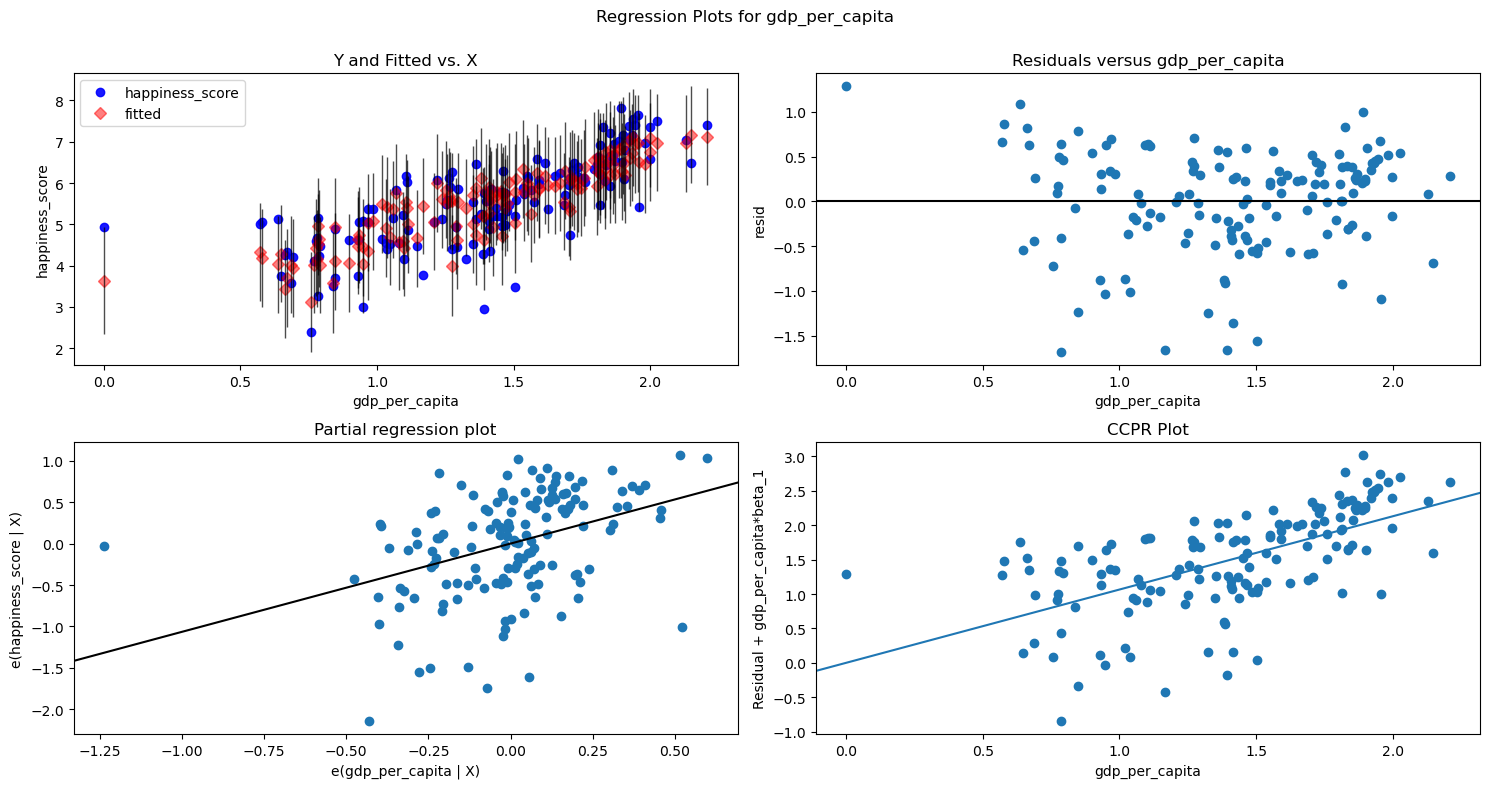

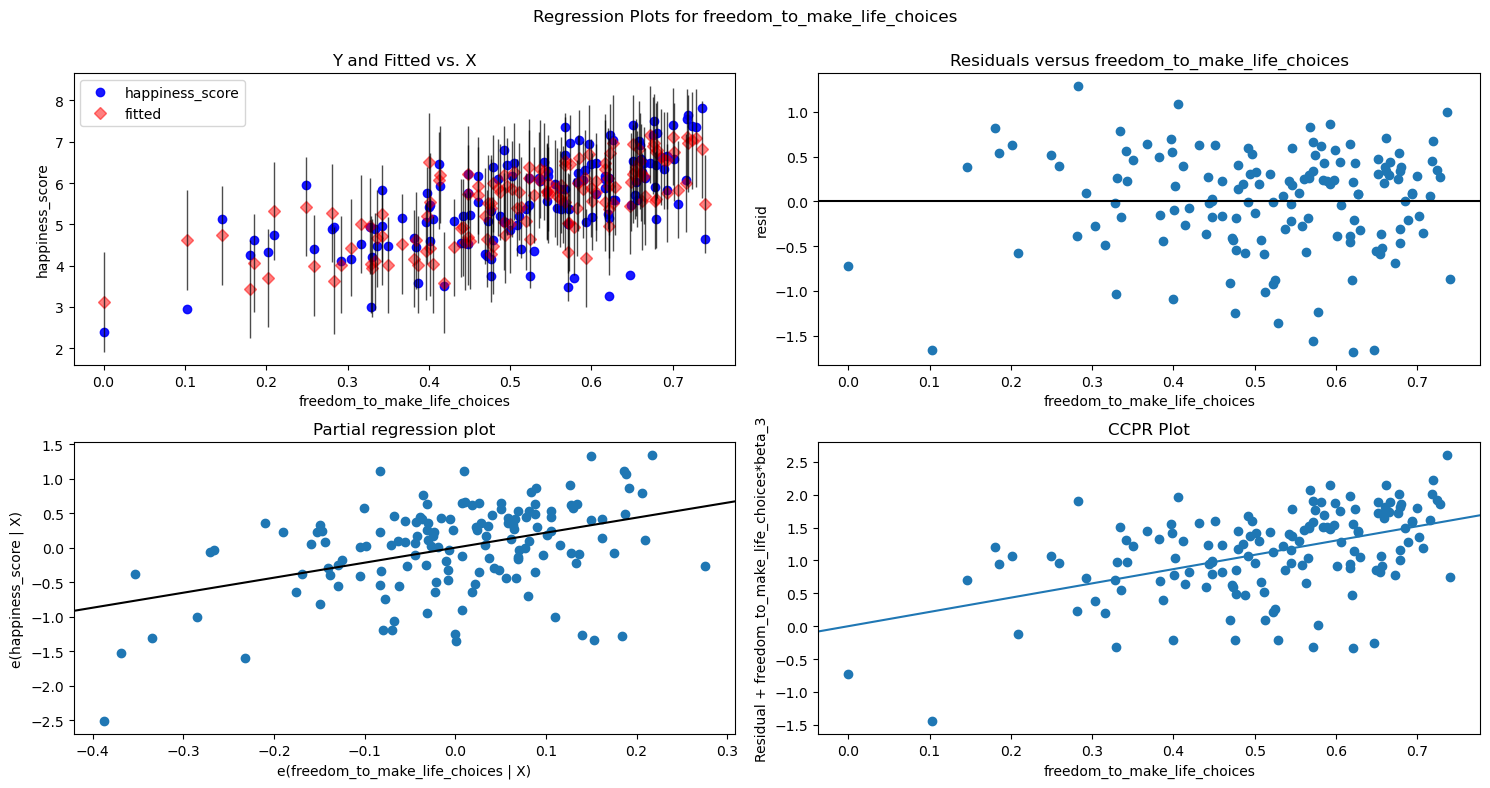

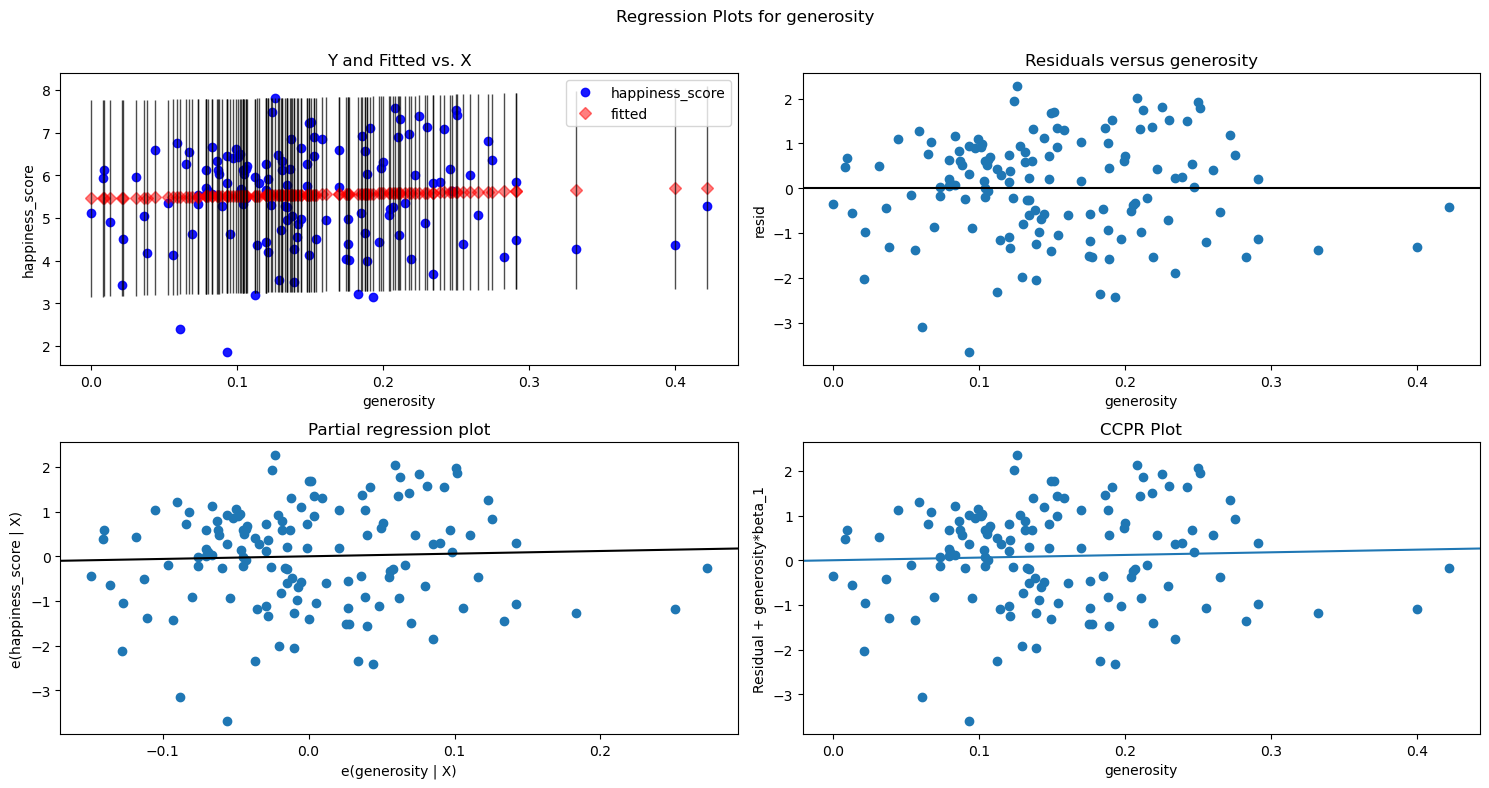

In [16]:
import statsmodels.api as sm
########## gdp_per_capita regression plot ##########
# Define the X and Y variables for the model
X_gdp = new_23['gdp_per_capita']
Y_gdp = new_23['happiness_score']

# Add a constant for the independent variable
X_const = sm.add_constant(X_gdp)

# Fit and summarize OLS model
model_gdp = sm.OLS(Y_gdp, X_const)
results_gdp = model_22.fit()

# Scatter plot for 2023


########## freedom_to_make_life_choices regression plot ##########
# Define the X and Y variables for the model
X_choice = new_23['freedom_to_make_life_choices']
Y_choice = new_23['happiness_score']

# Add a constant for the independent variable
choice_const = sm.add_constant(X_choice)

# Fit and summarize OLS model
model_choice = sm.OLS(Y_choice, choice_const)
results_choice = model_22.fit()

# Scatter plot for 2023

########## generosity regression plot ##########
# Define the X and Y variables for the model
X_gen = new_23['generosity']
Y_gen = new_23['happiness_score']

# Add a constant for the independent variable
gen_const = sm.add_constant(X_gen)

# Fit and summarize OLS model
model_gen = sm.OLS(Y_gen, gen_const)
results_gen = model_gen.fit()

# Scatter plot for 2023
fig_gdp = plt.figure(figsize=[15,8])
fig_gdp = sm.graphics.plot_regress_exog(results_gdp, 'gdp_per_capita', fig=fig_gdp)

fig_choice = plt.figure(figsize=[15,8])
fig_choice = sm.graphics.plot_regress_exog(results_choice, 'freedom_to_make_life_choices', fig=fig_choice)

fig_gen = plt.figure(figsize=[15,8])
fig_gen = sm.graphics.plot_regress_exog(results_gen, 'generosity', fig=fig_gen)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a person has diabetes or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis?select=diabetes.csv. 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [17]:
!curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv

df = pd.read_csv('diabetes.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0   145k      0 --:--:-- --:--:-- --:--:--  145k


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Outcome` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of just the columns `Glucose`, `BloodPressure`, `BMI`, and `Age`. Display the labels and features to make sure you did this correctly.

In [18]:
labels = df['Outcome']
features = df[['Glucose', 'BloodPressure','BMI','Age']]

print(labels.head())
print(features.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
   Glucose  BloodPressure   BMI  Age
0      148             72  33.6   50
1       85             66  26.6   31
2      183             64  23.3   32
3       89             66  28.1   21
4      137             40  43.1   33


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [19]:
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, random_state = 0)

feature_train.shape, feature_test.shape, label_train.shape, label_test.shape

((576, 4), (192, 4), (576,), (192,))

&#9989;  **Question 5.4 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [20]:
features_const = sm.add_constant(feature_train)

model = sm.Logit(label_train, features_const).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.494514
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.2416
Time:                        22:47:54   Log-Likelihood:                -284.84
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 3.588e-38
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.1149      0.796    -10.192      0.000      -9.675      -6.554
Glucose           0.0313      0.004      8.064      0.000       0.024       0.039
BloodPressure    -0.0097      0.006     -1.607      0.108      -0.021       0.002
BMI               0.0930      0.016      5.780      0.000       0.061       0.125
Age               0.0357      0.009      3.969      0.000       0.018       0.053
=================================================================================
"""

&#9989;  **Question 5.5 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [21]:
log_reg = LogisticRegression().fit(feature_train, label_train)

print('Prediction:', log_reg.predict(feature_train))
print('Accuracy:', log_reg.score(feature_test, label_test))

Prediction: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 1 0 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [23]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/Z8B1R2tasz" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University